In [1]:
!nvidia-smi

Sun Oct 29 05:01:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Install Dependencies**

In [2]:
!pip install -q numpy
!pip install -q matplotlib
!pip install -q pandas
!pip install -q tensorflow
!pip install -q scikit-learn
!pip install -q pandas-datareader
!pip install -q yfinance
!pip install --upgrade mplfinance
!pip install -q pmdarima
!pip install -q transformers
!pip install -q transformers[torch]
!pip install -q numpy
!pip install -q torch
!pip install -q scikit-learn
!pip3 install -q datasets
# Code Source Note: https://github.com/twopirllc/pandas-ta
!pip install -q pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 104.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (set

**Setting up Drive**

In [3]:
import os
import sys
from google.colab import drive
drive.mount('/content/drive')

# Set the working directory for the tasks
SKELETON_DIR = '/content/drive/MyDrive/stock-prediction/Final/Training'
os.chdir(SKELETON_DIR)

Mounted at /content/drive


**Import Dependencies**

In [4]:
from models import intialized_lstm, intialize_bert_model
from dataset import create_datasets, create_finbert_datasets, finbert_dataset_splitting, finbert_datasets_mapping, finbert_dataset_format
from train import train_lstm, lstm_predict_test, trainer_finbert
from transformers import pipeline

**Setting Up Datasets and Intialized Model for Training Purpose**

## LSTM

In [5]:
# Datasets for Training LSTM/GRU Model
''' data = raw data
    df = cleaned data
    train_data + test_data = splitted data
    train_feature_scaler + train_target_scaler = scaler
    '''
start='2019-01-01'
end='2023-09-07'
ticker='TSLA'
data, df, train_data, test_data, train_feature_scaler, train_target_scaler, x_train, x_test, y_train, y_test = create_datasets(start, end, ticker)

Loading Existing Data
Loading Prepared Data
Loading Existing Train and Test Data
Train Data Shape: (942, 14)
Test Data Shape: (236, 14)


In [6]:
# Intiailized LSTM Model
input_shape = (x_train.shape[1], x_train.shape[2])

# Intiailize layer configs
layer_configs = [
    { 'type': 'GRU', 'units': 100, 'return_sequences': True, 'dropout': 0.2 },
    { 'type': 'GRU', 'units': 100, 'return_sequences': False, 'dropout': 0.2 }
]

lstm_model = intialized_lstm(input_shape, layer_configs)
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 100)           33600     
                                                                 
 dropout (Dropout)           (None, 30, 100)           0         
                                                                 
 gru_1 (GRU)                 (None, 100)               60600     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 94301 (368.36 KB)
Trainable params: 94301 (368.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential

## Finbert

In [ ]:
# Initialized Bert Model
finbert_model, finbert_tokenizer = intialize_bert_model(path='bert-base-uncased', num_labels=3)
print(finbert_model.config)
print(finbert_tokenizer)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative",
    "1": "positive",
    "2": "neutral"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative": 0,
    "neutral": 2,
    "positive": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.34.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

BertTokenizer(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_t

In [ ]:
# Datasets for Training Finbert Model
train_path = 'datasets/train-00000-of-00001-db1b9d43fb2c6ce5.parquet'
test_path = 'datasets/test-00000-of-00001-106b8ac96d1287d8.parquet'

train_finbert_dataset = create_finbert_datasets(train_path)
test_finbert_dataset = create_finbert_datasets(test_path)

# Split train dataset for validation
train_finbert_dataset, val_finbert_dataset = finbert_dataset_splitting(train_finbert_dataset)

# Mapping
train_finbert_dataset = finbert_datasets_mapping(train_finbert_dataset, finbert_tokenizer)
val_finbert_dataset = finbert_datasets_mapping(val_finbert_dataset, finbert_tokenizer)
test_finbert_dataset = finbert_datasets_mapping(test_finbert_dataset, finbert_tokenizer)

# Correct Format
train_finbert_dataset = finbert_dataset_format(train_finbert_dataset, debug=True)
val_finbert_dataset = finbert_dataset_format(val_finbert_dataset, debug=True)
test_finbert_dataset = finbert_dataset_format(test_finbert_dataset, debug=True)

Map:   0%|          | 0/8588 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 8588
})


Map:   0%|          | 0/955 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 955
})


Map:   0%|          | 0/2388 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 2388
})
Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 8588
})
Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 955
})
Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 2388
})


**Training**

## LSTM

Learning rate:  0.001
Epoch 1/100
722/729 [============================>.] - ETA: 0s - loss: 0.0080 - accuracy: 0.0028
Epoch 1: val_loss improved from inf to 0.00694, saving model to model/best_model.pt

Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to model/best_model_acc.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


729/729 [==============================] - 22s 17ms/step - loss: 0.0080 - accuracy: 0.0027 - val_loss: 0.0069 - val_accuracy: 0.0000e+00 - lr: 0.0010
Learning rate:  0.001
Epoch 2/100
729/729 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 0.0027
Epoch 2: val_loss improved from 0.00694 to 0.00215, saving model to model/best_model.pt

Epoch 2: val_accuracy did not improve from 0.00000
729/729 [==============================] - 12s 16ms/step - loss: 0.0038 - accuracy: 0.0027 - val_loss: 0.0022 - val_accuracy: 0.0000e+00 - lr: 0.0010
Learning rate:  0.001
Epoch 3/100
727/729 [============================>.] - ETA: 0s - loss: 0.0033 - accuracy: 0.0028
Epoch 3: val_loss did not improve from 0.00215

Epoch 3: val_accuracy did not improve from 0.00000
729/729 [==============================] - 5s 7ms/step - loss: 0.0033 - accuracy: 0.0027 - val_loss: 0.0064 - val_accuracy: 0.0000e+00 - lr: 0.0010
Learning rate:  0.001
Epoch 4/100
729/729 [==============================] 

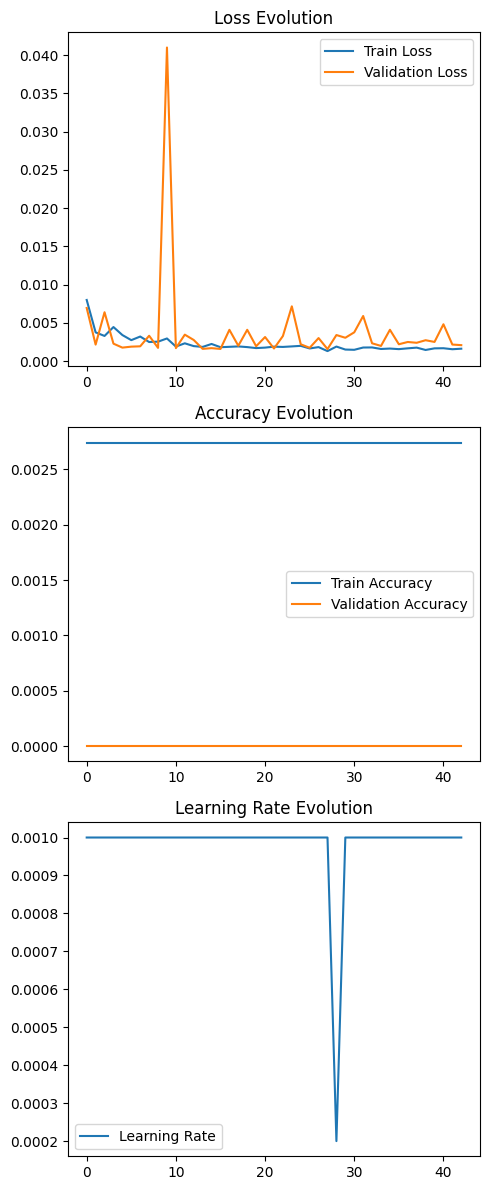

In [7]:
history = train_lstm(lstm_model, x_train=x_train, y_train=y_train, batch_size=1, epochs=100)

In [8]:
lstm_predictions = lstm_predict_test(lstm_model, train_target_scaler=train_target_scaler, x_test=x_test, y_test=y_test)

7/7 [==============================] - 1s 4ms/step


## Finbert

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.401648,0.849215
2,0.450400,0.387745,0.857592
3,0.450400,0.391806,0.865969
4,0.149500,0.520037,0.864921
5,0.149500,0.646787,0.861780
6,0.055300,0.681732,0.874346
7,0.055300,0.755687,0.873298
8,0.020800,0.804245,0.863874
9,0.020800,0.821732,0.870157
10,0.011200,0.829049,0.868063


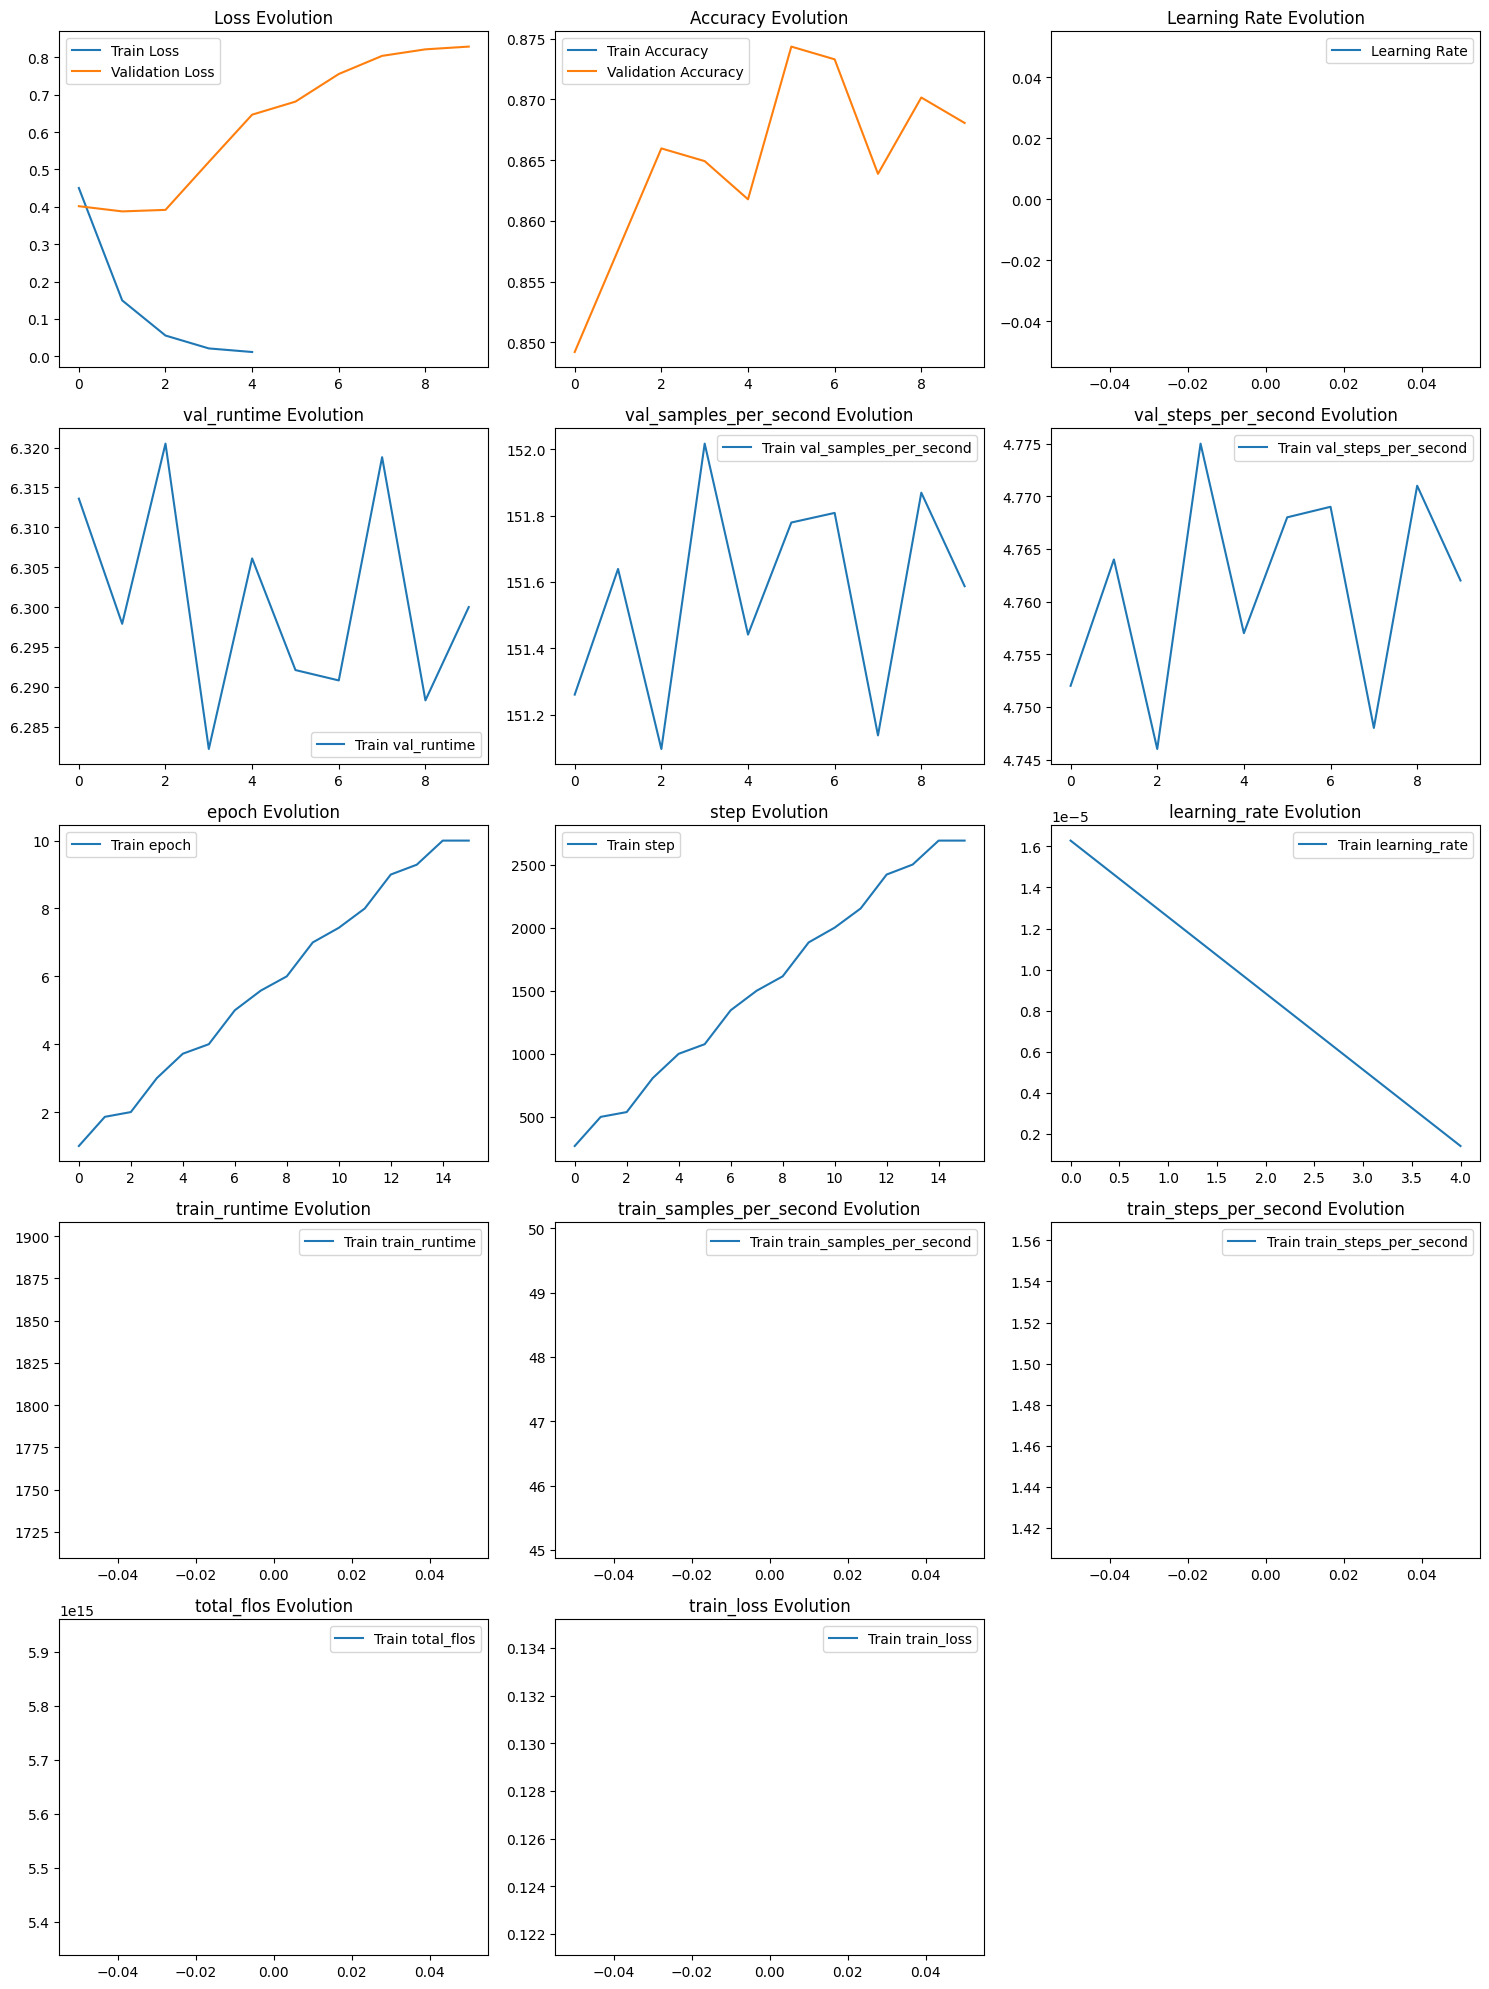

In [ ]:
# Intialize trainer
trainer = trainer_finbert(finbert_model, finbert_tokenizer, train_finbert_dataset, val_finbert_dataset, epochs=10)

In [ ]:
# Testing
finbert_model.eval()
trainer.predict(test_finbert_dataset).metrics

{'test_loss': 0.6591427326202393,
 'test_accuracy': 0.8777219430485762,
 'test_runtime': 15.7914,
 'test_samples_per_second': 151.221,
 'test_steps_per_second': 4.749}

In [ ]:
# Testing Real Life
# Initialized Bert Model
finbert_model, finbert_tokenizer = intialize_bert_model(path='finbert/', num_labels=3)
nlp = pipeline("text-classification", model=finbert_model, tokenizer=finbert_tokenizer)
results = nlp(['Tesla shares drop by 10%',
              'Tesla miss earning report',
              'Elon Musk fired half of his employee',
              'Elon Musk selling half of Tesla shares'])
print(results)

[{'label': 'negative', 'score': 0.9990158081054688}, {'label': 'negative', 'score': 0.9991371035575867}, {'label': 'negative', 'score': 0.9904800057411194}, {'label': 'negative', 'score': 0.9838518500328064}]


In [ ]:
results

[{'label': 'negative', 'score': 0.9990158081054688},
 {'label': 'negative', 'score': 0.9991371035575867},
 {'label': 'negative', 'score': 0.9904800057411194},
 {'label': 'negative', 'score': 0.9838518500328064}]

In [ ]:
neutral_score, positive_score, negative_score = 0.0, 0.0, 0.0

for result in results:
    sentiment = result['label']
    score = result['score']

    if sentiment == 'neutral':
        neutral_score += score
    elif sentiment == 'positive':
        positive_score += score
    elif sentiment == 'negative':
        negative_score += score

# Check which sentiment has the highest cumulative score
if neutral_score > positive_score and neutral_score > negative_score:
    overall_sentiment = 'neutral'
elif positive_score > neutral_score and positive_score > negative_score:
    overall_sentiment = 'positive'
else:
    overall_sentiment = 'negative'

print(f"Overall Sentiment: {overall_sentiment}")

# Investment decision based on sentiment (example logic)
if overall_sentiment == 'positive':
    print("Consider buying.")
elif overall_sentiment == 'negative':
    print("Consider selling or holding.")
else:
    print("Stay neutral, await further signals.")


Overall Sentiment: negative
Consider selling or holding.
